In [2]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
import numpy as np

In [3]:
# Leitura dos arquivos CSV
df_amazon = pd.read_csv('./data/amazon.csv', sep=',', encoding='utf-8')
df_appletv = pd.read_csv('./data/appletv.csv', sep=',', encoding='utf-8')
df_max = pd.read_csv('./data/max.csv', sep=',', encoding='utf-8')
df_netflix = pd.read_csv('./data/netflix.csv', sep=',', encoding='utf-8')

In [4]:
df_amazon

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,NaN
1,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19917.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,NaN
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,NaN
4,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,120542.0,NaN
...,...,...,...,...,...,...,...,...
72731,NaN,tv,NaN,2026.0,NaN,NaN,NaN,NaN
72732,NaN,tv,"Drama, Crime, Mystery",2025.0,NaN,NaN,NaN,NaN
72733,NaN,tv,"Action & Adventure, Sci-Fi & Fantasy, Drama, C...",2015.0,NaN,NaN,NaN,NaN
72734,The Toque 12,tv,Reality-TV,2022.0,tt18293470,8.2,13.0,NaN


In [5]:
df_appletv

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,NaN
1,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1248191.0,NaN
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,NaN
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,194215.0,NaN
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1249835.0,NaN
...,...,...,...,...,...,...,...,...
18614,V temnote,tv,Game-Show,2025.0,tt36268649,NaN,NaN,NaN
18615,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1987.0,tt30970892,8.8,235.0,NaN
18616,NaN,tv,NaN,2023.0,NaN,NaN,NaN,NaN
18617,NaN,tv,NaN,2025.0,NaN,NaN,NaN,NaN


In [6]:
df_max

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,215523.0,NaN
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,454117.0,NaN
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1135558.0,NaN
3,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,753004.0,NaN
4,Absolute Power,movie,"Action, Crime, Drama",1997.0,tt0118548,6.7,62769.0,NaN
...,...,...,...,...,...,...,...,...
10183,NaN,tv,Mystery,2025.0,NaN,NaN,NaN,NaN
10184,NaN,tv,"Drama, Crime, Mystery",2025.0,NaN,NaN,NaN,NaN
10185,NaN,tv,"Action & Adventure, Sci-Fi & Fantasy, Drama, C...",2015.0,NaN,NaN,NaN,NaN
10186,Lockerbie: The Bombing of Pan Am 103,tv,"Crime, Documentary, History",2025.0,tt35422524,7.3,85.0,NaN


In [7]:
df_netflix

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7992.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1248191.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,526891.0,NaN
...,...,...,...,...,...,...,...,...
21708,Race for the Crown,tv,"Documentary, Sport",2025.0,tt36414438,6.8,175.0,NaN
21709,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1987.0,tt30970892,8.8,235.0,NaN
21710,NaN,tv,NaN,2021.0,NaN,NaN,NaN,NaN
21711,NaN,tv,"Action & Adventure, Sci-Fi & Fantasy, Drama, C...",2015.0,NaN,NaN,NaN,NaN


In [8]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72736 entries, 0 to 72735
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               70983 non-null  object 
 1   type                72736 non-null  object 
 2   genres              70539 non-null  object 
 3   releaseYear         72531 non-null  float64
 4   imdbId              65958 non-null  object 
 5   imdbAverageRating   63531 non-null  float64
 6   imdbNumVotes        63531 non-null  float64
 7   availableCountries  287 non-null    object 
dtypes: float64(3), object(5)
memory usage: 4.4+ MB


In [9]:
import pandas as pd

# Leitura individual dos datasets com adição da coluna 'streamming'
df_amazon['streamming'] = 'Amazon'
df_appletv['streamming'] = 'Appletv'
df_max['streamming'] = 'Max'
df_netflix['streamming'] = 'Netflix'

# Merge dos 4 dataframes
df_merged = pd.concat([df_amazon, df_appletv, df_max, df_netflix], ignore_index=True)

df_merged


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,streamming
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,NaN,Amazon
1,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19917.0,NaN,Amazon
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,NaN,Amazon
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,NaN,Amazon
4,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,120542.0,NaN,Amazon
...,...,...,...,...,...,...,...,...,...
123251,Race for the Crown,tv,"Documentary, Sport",2025.0,tt36414438,6.8,175.0,NaN,Netflix
123252,Das Boot - Die komplette TV-Serie,tv,"Drama, War",1987.0,tt30970892,8.8,235.0,NaN,Netflix
123253,NaN,tv,NaN,2021.0,NaN,NaN,NaN,NaN,Netflix
123254,NaN,tv,"Action & Adventure, Sci-Fi & Fantasy, Drama, C...",2015.0,NaN,NaN,NaN,NaN,Netflix


In [10]:
df = df_merged.copy()

In [11]:
df.drop_duplicates(subset=['title', 'releaseYear', 'streamming'], inplace=True)

In [12]:
# Verificar quantidade e porcentagem de valores nulos por coluna
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

# Combinar em um DataFrame para melhor visualização
null_summary = pd.DataFrame({
    'Qtd_Nulos': null_counts,
    '%_Nulos': null_percent
}).sort_values(by='Qtd_Nulos', ascending=False)

# Exibir resultado
print(null_summary)

                    Qtd_Nulos    %_Nulos
availableCountries     118655  99.611310
imdbNumVotes            10390   8.722443
imdbAverageRating       10390   8.722443
imdbId                   7266   6.099834
genres                   2229   1.871254
title                     173   0.145234
releaseYear               100   0.083950
type                        0   0.000000
streamming                  0   0.000000


In [13]:
# Filtrar linhas onde ambas as colunas são nulas
linhas_nulas_ambas = df[df['imdbNumVotes'].isnull() & df['imdbAverageRating'].isnull()]

# Contar essas linhas
total_nulas_ambas = len(linhas_nulas_ambas)
print(f"Total de linhas com ambas colunas nulas: {total_nulas_ambas}")

Total de linhas com ambas colunas nulas: 10390


In [14]:
# Verifica se colunas existem
if {'imdbNumVotes', 'imdbAverageRating', 'title'}.issubset(df.columns):

    # Contador de alterações
    alteracoes = 0

    # Iterar pelas linhas com as duas colunas nulas
    for idx, row in df[df['imdbNumVotes'].isnull() & df['imdbAverageRating'].isnull()].iterrows():
        titulo = row['title']

        # Procurar outra linha com o mesmo título e com valores válidos
        match = df[
            (df['title'] == titulo) &
            df['imdbNumVotes'].notnull() &
            df['imdbAverageRating'].notnull()
        ]

        if not match.empty:
            # Pegar os valores da primeira ocorrência válida
            df.at[idx, 'imdbNumVotes'] = match.iloc[0]['imdbNumVotes']
            df.at[idx, 'imdbAverageRating'] = match.iloc[0]['imdbAverageRating']
            alteracoes += 1

    print(f"Total de registros atualizados com base em títulos duplicados: {alteracoes}")

else:
    print("Colunas esperadas ('title', 'imdbNumVotes', 'imdbAverageRating') não estão presentes no DataFrame.")

Total de registros atualizados com base em títulos duplicados: 1233


In [15]:
# Registrar o número de linhas antes do drop
linhas_antes = len(df)

# Dropando coluna irrelevante com muitos dados ausentes
df.drop(columns=['availableCountries'], inplace=True)

# Dropar registros com valores nulos em colunas relevantes
df.dropna(subset=['imdbAverageRating', 'imdbNumVotes', 'title'], inplace=True)

# Registrar o número de linhas após o drop
linhas_depois = len(df)

# Calcular quantidade e percentual de linhas removidas
linhas_removidas = linhas_antes - linhas_depois
percentual_removido = (linhas_removidas / linhas_antes) * 100

# Exibir o relatório
print(f"Total de registros removidos: {linhas_removidas}")
print(f"Percentual removido: {percentual_removido:.2f}%")

Total de registros removidos: 9157
Percentual removido: 7.69%


In [16]:
# Conta quantas linhas têm valores nulos na coluna 'genres'
num_nulos_genres = df['genres'].isnull().sum()
percentual_nulos = df['genres'].isnull().mean() * 100
print(f"{percentual_nulos:.2f}%")
print(num_nulos_genres)

0.41%
447


In [17]:
df.dropna(subset=['genres'], inplace=True)

In [18]:
print("\nContagem por tipo:")
print(df['type'].value_counts(dropna=False))


Contagem por tipo:
type
movie    90892
tv       18622
Name: count, dtype: int64


In [19]:
df = df[df['type'] != 'tv']

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Preenche valores nulos na coluna 'genres' com string vazia (evita erro ao aplicar split)
df['genres'] = df['genres'].fillna('')

# Converte a string de gêneros em listas (ex: "Action, Comedy" → ["Action", "Comedy"])
df['genres_list'] = df['genres'].apply(lambda x: x.split(', ') if x else [])

# Instancia o binarizador para variáveis com múltiplos rótulos (MultiLabel)
mlb = MultiLabelBinarizer()

# Aplica o binarizador à lista de gêneros, gerando colunas binárias para cada gênero distinto
genres_encoded = pd.DataFrame(
    mlb.fit_transform(df['genres_list']),  # Matriz binária (0/1)
    columns=mlb.classes_,                  # Nomes das colunas com os gêneros únicos
    index=df.index                         # Mantém o mesmo índice do DataFrame original
)

# Concatena as colunas binarizadas ao DataFrame original
df = pd.concat([df, genres_encoded], axis=1)
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,streamming,genres_list,Action,...,Romance,Sci-Fi,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,Amazon,"[Comedy, Crime, Romance]",0,...,1,0,0,0,0,0,0,0,0,0
1,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19917.0,Amazon,"[Action, Crime, Drama]",1,...,0,0,0,0,0,0,0,0,0,0
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,Amazon,"[Drama, Romance]",0,...,1,0,0,0,0,0,0,0,0,0
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,Amazon,"[Drama, Mystery]",0,...,0,0,0,0,0,0,0,0,0,0
4,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,120542.0,Amazon,"[Crime, Drama, Musical]",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117949,What Are the Odds?,movie,"Comedy, Short",2006.0,tt0498400,6.6,29.0,Netflix,"[Comedy, Short]",0,...,0,0,0,1,0,0,0,0,0,0
117951,Meraklii,movie,"Comedy, Drama",2025.0,tt36540303,3.6,7.0,Netflix,"[Comedy, Drama]",0,...,0,0,0,0,0,0,0,0,0,0
117952,Mugamoodi,movie,"Music, Mystery, Drama",2025.0,NaN,5.1,1408.0,Netflix,"[Music, Mystery, Drama]",0,...,0,0,0,0,0,0,0,0,0,0
117953,El Titán: The Adrián González Story,movie,Documentary,2023.0,tt30333707,8.0,13.0,Netflix,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribuição de imdbNumVotes')

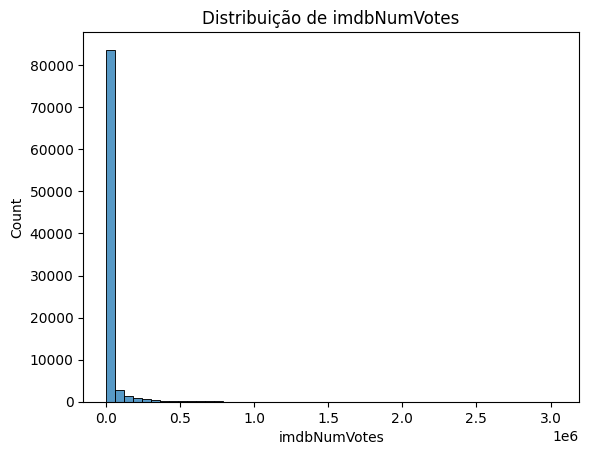

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['imdbNumVotes'], bins=50)
plt.title("Distribuição de imdbNumVotes")

# A maioria absoluta dos títulos têm uma quantidade muito baixa de votos

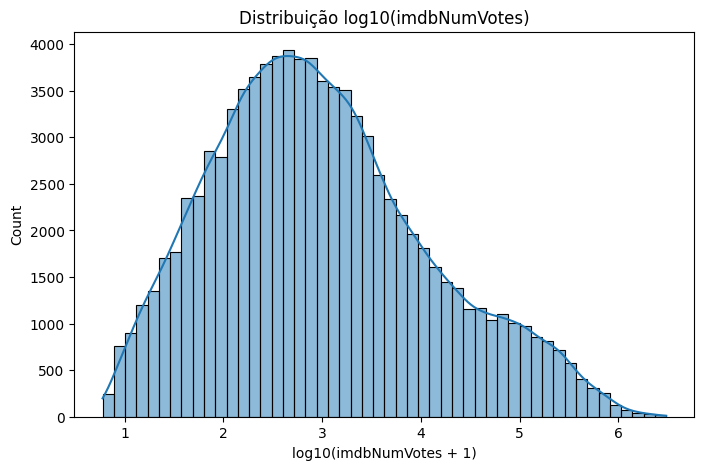

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar coluna log-transformada para visualização
df['imdbNumVotes_log'] = np.log10(df['imdbNumVotes'] + 1)

# Plot do log
plt.figure(figsize=(8, 5))
sns.histplot(df['imdbNumVotes_log'], bins=50, kde=True)
plt.title("Distribuição log10(imdbNumVotes)")
plt.xlabel("log10(imdbNumVotes + 1)")
plt.ylabel("Count")
plt.show()

# Maior parte dos filmes tem entre 2 a 3 (10² e 10³) de avaliação

In [23]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Verificar se a coluna log já existe, senão cria
if 'imdbNumVotes_log' not in df.columns:
    df['imdbNumVotes_log'] = np.log10(df['imdbNumVotes'] + 1)

# Aplicar RobustScaler
scaler = RobustScaler()
df['imdbNumVotes_log_robust'] = scaler.fit_transform(df[['imdbNumVotes_log']])

# Visualizar amostra
print(df[['imdbNumVotes', 'imdbNumVotes_log', 'imdbNumVotes_log_robust']].head())


   imdbNumVotes  imdbNumVotes_log  imdbNumVotes_log_robust
0        9163.0          3.962085                 0.741774
1       19917.0          4.299246                 0.970252
2     2376803.0          6.375993                 2.377572
3      480694.0          5.681870                 1.907195
4      120542.0          5.081142                 1.500109


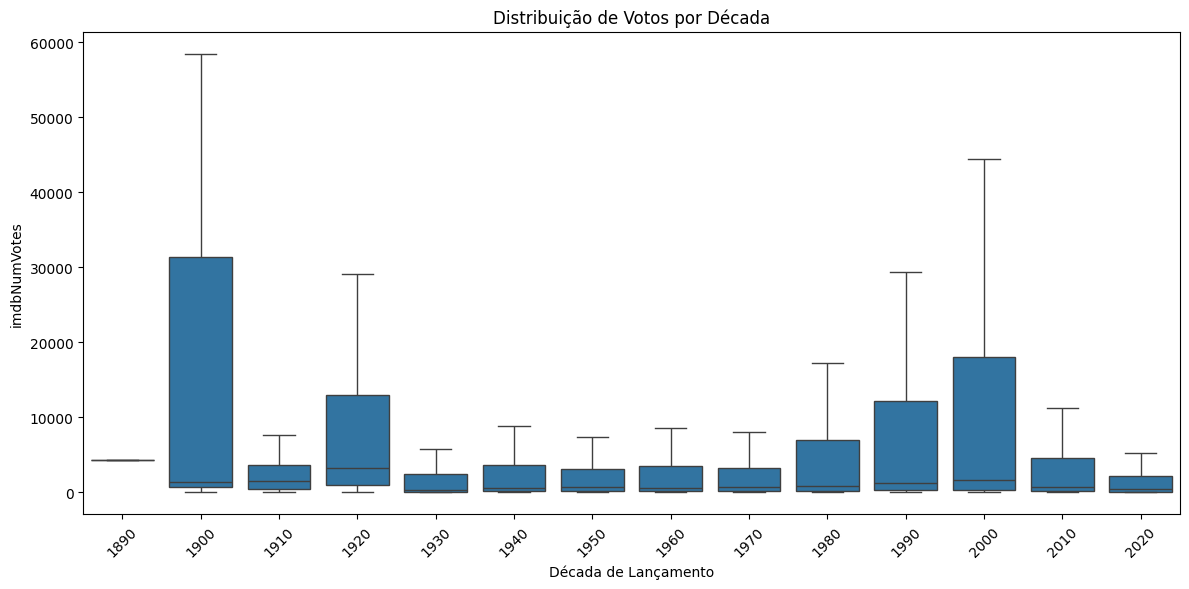

In [24]:
# Garantir que releaseYear seja numérico e permitir NaN
df['releaseYear'] = pd.to_numeric(df['releaseYear'], errors='coerce')
# Criar coluna de década (apenas para linhas com ano disponível)
df['decade'] = (df['releaseYear'] // 10 * 10).astype('Int64')

import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas registros válidos
df_valid = df[df['releaseYear'].notnull() & df['imdbNumVotes'].notnull()]

# Plotar boxplot para comparar distribuição de votos por década
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_valid, x='decade', y='imdbNumVotes', showfliers=False)
plt.xticks(rotation=45)
plt.title('Distribuição de Votos por Década')
plt.ylabel('imdbNumVotes')
plt.xlabel('Década de Lançamento')
plt.tight_layout()
plt.show()

In [25]:
# Garantir tipos corretos
df['releaseYear'] = pd.to_numeric(df['releaseYear'], errors='coerce')
df['imdbNumVotes'] = pd.to_numeric(df['imdbNumVotes'], errors='coerce')

# criar coluna de década para os dados conhecidos
df['decade'] = (df['releaseYear'] // 10 * 10).astype('Int64')

# criar bins de votos (log)
df['vote_bin'] = pd.cut(
    np.log10(df['imdbNumVotes'] + 1),
    bins=[0, 2, 3, 4, 5, 6, np.inf],
    labels=['0-100', '101-1k', '1k-10k', '10k-100k', '100k-1M', '1M+']
)

# calcular a moda da década para cada bin
decada_por_bin = (
    df[df['decade'].notnull()]
    .groupby('vote_bin')['decade']
    .agg(lambda x: x.mode().iloc[0])  # moda por bin
)

# função para imputar ano com base no bin
def imputar_ano(row):
    if pd.isnull(row['releaseYear']) and pd.notnull(row['vote_bin']):
        return decada_por_bin.get(row['vote_bin'], np.nan)
    return row['decade']

# Criar coluna imputada
df['decade_imputada'] = df.apply(imputar_ano, axis=1)

# Para quem quiser ano e não só década, pode atribuir um ano médio:
df['releaseYear_imputado'] = df['releaseYear']
df.loc[df['releaseYear'].isnull(), 'releaseYear_imputado'] = df['decade_imputada'] + 5

df.head()

C:\Users\jarthur\AppData\Local\Temp\ipykernel_26448\4270953834.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('vote_bin')['decade']


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,streamming,genres_list,Action,...,Talk-Show,Thriller,War,Western,imdbNumVotes_log,imdbNumVotes_log_robust,decade,vote_bin,decade_imputada,releaseYear_imputado
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,Amazon,"[Comedy, Crime, Romance]",0,...,0,0,0,0,3.962085,0.741774,1980,1k-10k,1980,1988.0
1,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19917.0,Amazon,"[Action, Crime, Drama]",1,...,0,0,0,0,4.299246,0.970252,1990,10k-100k,1990,1993.0
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,Amazon,"[Drama, Romance]",0,...,0,0,0,0,6.375993,2.377572,1990,1M+,1990,1994.0
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,Amazon,"[Drama, Mystery]",0,...,0,0,0,0,5.681870,1.907195,1940,100k-1M,1940,1941.0
4,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,120542.0,Amazon,"[Crime, Drama, Musical]",0,...,0,0,0,0,5.081142,1.500109,2000,100k-1M,2000,2000.0


In [26]:
le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'].fillna('Unknown'))

le_stream = LabelEncoder()
df['streamming_encoded'] = le_stream.fit_transform(df['streamming'].fillna('Unknown'))
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,streamming,genres_list,Action,...,War,Western,imdbNumVotes_log,imdbNumVotes_log_robust,decade,vote_bin,decade_imputada,releaseYear_imputado,type_encoded,streamming_encoded
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9163.0,Amazon,"[Comedy, Crime, Romance]",0,...,0,0,3.962085,0.741774,1980,1k-10k,1980,1988.0,0,0
1,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19917.0,Amazon,"[Action, Crime, Drama]",1,...,0,0,4.299246,0.970252,1990,10k-100k,1990,1993.0,0,0
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376803.0,Amazon,"[Drama, Romance]",0,...,0,0,6.375993,2.377572,1990,1M+,1990,1994.0,0,0
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,480694.0,Amazon,"[Drama, Mystery]",0,...,0,0,5.681870,1.907195,1940,100k-1M,1940,1941.0,0,0
4,Dancer in the Dark,movie,"Crime, Drama, Musical",2000.0,tt0168629,7.9,120542.0,Amazon,"[Crime, Drama, Musical]",0,...,0,0,5.081142,1.500109,2000,100k-1M,2000,2000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117949,What Are the Odds?,movie,"Comedy, Short",2006.0,tt0498400,6.6,29.0,Netflix,"[Comedy, Short]",0,...,0,0,1.477121,-0.942176,2000,0-100,2000,2006.0,0,3
117951,Meraklii,movie,"Comedy, Drama",2025.0,tt36540303,3.6,7.0,Netflix,"[Comedy, Drama]",0,...,0,0,0.903090,-1.331171,2020,0-100,2020,2025.0,0,3
117952,Mugamoodi,movie,"Music, Mystery, Drama",2025.0,NaN,5.1,1408.0,Netflix,"[Music, Mystery, Drama]",0,...,0,0,3.148911,0.190722,2020,1k-10k,2020,2025.0,0,3
117953,El Titán: The Adrián González Story,movie,Documentary,2023.0,tt30333707,8.0,13.0,Netflix,[Documentary],0,...,0,0,1.146128,-1.166475,2020,0-100,2020,2023.0,0,3


In [27]:
from sklearn.preprocessing import StandardScaler

# ===== Colunas manuais e de engenharia de atributos =====
feature_cols = [
    'releaseYear_imputado',  # substitui releaseYear original se foi imputado
    'imdbNumVotes_log_robust',
    'streamming_encoded',
]

# ===== Gêneros (binarização via MultiLabelBinarizer) =====
feature_cols += list(genres_encoded.columns)

# ===== Colunas opcionais (adicionadas se existirem) =====
optional_cols = ['matches_user_type', 'is_available_for_user']
feature_cols += [col for col in optional_cols if col in df.columns]

# ===== Feature final =====
X = df[feature_cols]
y = df['imdbAverageRating']

# ===== Padronização (Z-score) =====
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


In [28]:
X

,releaseYear_imputado,imdbNumVotes_log_robust,streamming_encoded,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Romance,Sci-Fi,Science Fiction,Short,Sport,TV Movie,Talk-Show,Thriller,War,Western
0,1988.0,0.741774,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1993.0,0.970252,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1994.0,2.377572,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1941.0,1.907195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.0,1.500109,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117949,2006.0,-0.942176,3,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
117951,2025.0,-1.331171,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
117952,2025.0,0.190722,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117953,2023.0,-1.166475,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y

0         7.4
1         6.6
2         8.8
3         8.3
4         7.9
         ... 
117949    6.6
117951    3.6
117952    5.1
117953    8.0
117957    7.2
Name: imdbAverageRating, Length: 90892, dtype: float64

# Treinamento

In [30]:
import joblib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import sklearn.metrics as skm  # Use prefixo explícito

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Função de avaliação
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    r2 = skm.r2_score(y_val, y_pred)
    rmse = np.sqrt(skm.mean_squared_error(y_val, y_pred))
    mae = skm.mean_absolute_error(y_val, y_pred)

    print(f'{model_name} Performance:')
    print(f'R²   : {r2:.4f}')
    print(f'RMSE : {rmse:.4f}')
    print(f'MAE  : {mae:.4f}')
    print('-' * 30)

    return {"r2": r2, "rmse": rmse, "mae": mae}

In [31]:
def train_models_pipeline(X: pd.DataFrame, y: pd.Series, save_path='model_'):
    """
    Treina modelos supervisionados (LightGBM, XGBoost e CatBoost),
    avalia, salva os modelos e imprime métricas após o loop.
    """
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        'LightGBM': LGBMRegressor(n_estimators=100, boosting_type='gbdt', random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
    }

    all_metrics = {}

    for name, model in models.items():
        print(f'\n🔧 Treinando {name}...')
        model.fit(X_train, y_train)
        metrics = evaluate_model(model, X_val, y_val, model_name=name)
        all_metrics[name] = metrics
        joblib.dump(model, f'{save_path}{name.lower()}.pkl')

    # Impressão final consolidada
    print("\n Métricas comparativas:")
    for name, m in all_metrics.items():
        print(f"{name}: R²={m['r2']:.4f} | RMSE={m['rmse']:.4f} | MAE={m['mae']:.4f}")


In [32]:
df = df.reset_index(drop=True)
train_models_pipeline(X, y)


🔧 Treinando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 72713, number of used features: 29
[LightGBM] [Info] Start training from score 5.962484
LightGBM Performance:
R²   : 0.4500
RMSE : 0.9382
MAE  : 0.7117
------------------------------

🔧 Treinando XGBoost...
XGBoost Performance:
R²   : 0.4541
RMSE : 0.9347
MAE  : 0.7037
------------------------------

🔧 Treinando CatBoost...
CatBoost Performance:
R²   : 0.4337
RMSE : 0.9520
MAE  : 0.7247
------------------------------

 Métricas comparativas:
LightGBM: R²=0.4500 | RMSE=0.9382 | MAE=0.7117
XGBoost: R²=0.4541 | RMSE=0.9347 | MAE=0.7037
CatBoost: R²=0.4337 | RMSE=0.9520 | MAE

In [33]:
def plot_model_comparison(models: dict, X_val, y_val):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_val)
        residuals = y_val - y_pred
        df_plot = pd.DataFrame({
            'Model': name,
            'Real': y_val,
            'Predicted': y_pred,
            'Residual': residuals
        })
        results.append(df_plot)

    df_all = pd.concat(results)

    # 1. Dispersão Real vs Predito
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_all, x='Real', y='Predicted', hue='Model', alpha=0.4)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=1)
    plt.title("Real vs. Predito")
    plt.xlabel("Nota Real (IMDb)")
    plt.ylabel("Nota Prevista")
    plt.grid(True)
    plt.show()

    # 2. Distribuição dos Resíduos
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_all, x='Residual', hue='Model', bins=40, kde=True, element="step")
    plt.title("Distribuição dos Resíduos")
    plt.xlabel("Erro (Real - Previsto)")
    plt.grid(True)
    plt.show()

    # 3. Boxplot dos Resíduos
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_all, x='Model', y='Residual')
    plt.title("Distribuição dos Resíduos por Modelo")
    plt.ylabel("Erro Absoluto")
    plt.grid(True)
    plt.show()

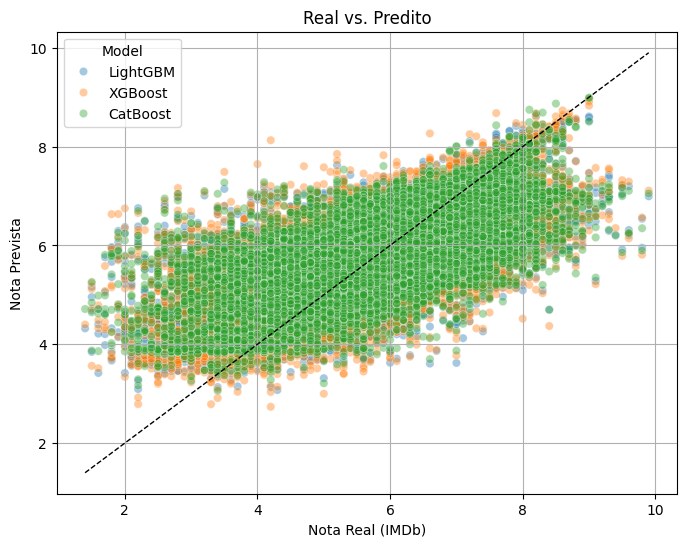

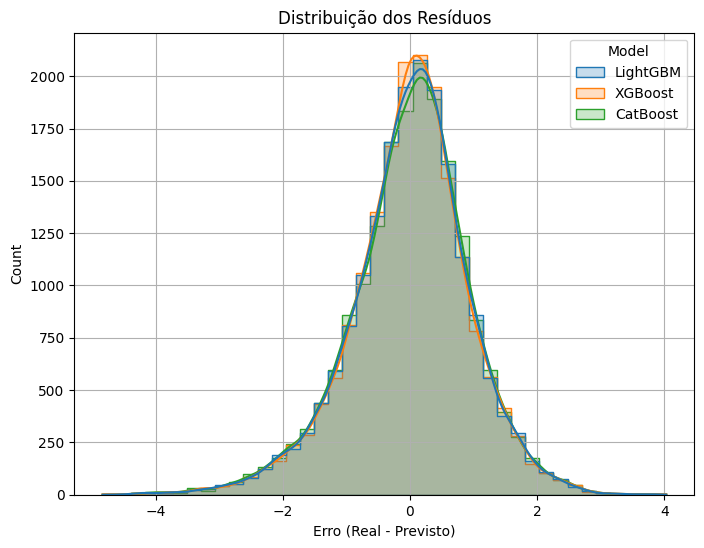

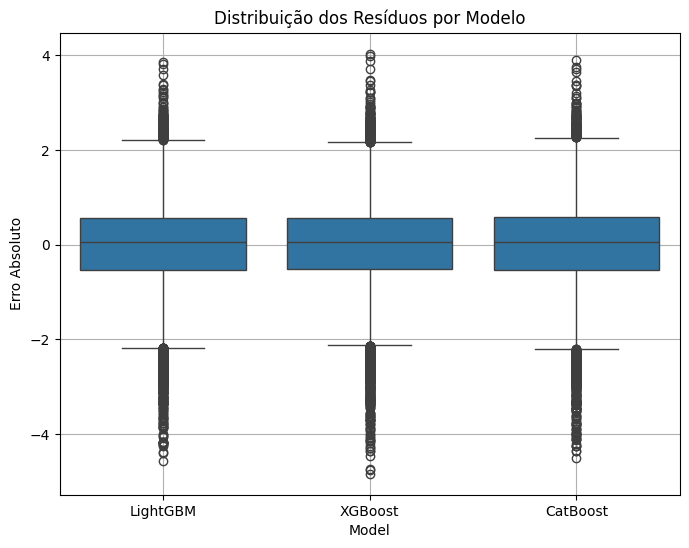

In [34]:
from sklearn.model_selection import train_test_split

# Redefinir y se necessário
y = df['imdbAverageRating']

# Recriar split com a mesma semente
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model_lgb = joblib.load("model_lightgbm.pkl")
model_xgb = joblib.load("model_xgboost.pkl")
model_cat = joblib.load("model_catboost.pkl")

models = {
    'LightGBM': model_lgb,
    'XGBoost': model_xgb,
    'CatBoost': model_cat
}

plot_model_comparison(models, X_val, y_val)

In [35]:
import pandas as pd

# DataFrame final com os dados transformados e prontos
df.to_parquet('dataset.parquet', index=False)

In [36]:
import joblib

# lista de colunas usadas para X_train/X_scaled
joblib.dump(feature_cols, 'features.pkl')

['features.pkl']